#### Batch normalization
* normalizes per channels for all batch: (N,C,H,W). Each normalization set is (N,H,W). Input is # of features, or channels
* channel is the left out dimension. For each channel, normalize all the batches

In [20]:
import torch
from torch import nn

In [21]:
# With Learnable Parameters
m = nn.BatchNorm2d(100)
# Without Learnable Parameters
m = nn.BatchNorm2d(100, affine=False)
input = torch.randn(20, 100, 35, 45)
output = m(input)
print(output.shape)

torch.Size([20, 100, 35, 45])


#### Layer Normalization
* Designed to overcome the drawback of BN. Normalize along batch (C,H,W)
* Extra dimension is batch dimension

In [17]:
N, C, H, W = 20, 5, 10, 10
input = torch.randn(N, C, H, W)
# Normalize over the last three dimensions (i.e. the channel and spatial dimensions)
# as shown in the image below
layer_norm = nn.LayerNorm([C, H, W])
output = layer_norm(input)

#### Instance normalization
* Normalize over the sets of (H,W). = BN with batch size = 1
* Niched. Especially useful for style transfer -discarding contrast info

In [19]:
# Without Learnable Parameters
m = nn.InstanceNorm2d(100)
# With Learnable Parameters
m = nn.InstanceNorm2d(100, affine=True)
input = torch.randn(20, 100, 35, 45)
output = m(input)

#### Group normalization

* independent of batch size. Similar to layers normalization. Normalizing the channels into different groups and normalize each subset ($C_i$,H,W). Middle ground between Instance Norm and Layer Norm. 
* num of groups for normalization is predefined hyperparameters. When G = C (channels #), it becomes instance norm
* divides channels into groups and computes within each group. this approach is especially helpful for tickling training data batch that takes large GPU memory such as Videos or 3D images. [Source](https://towardsdatascience.com/what-is-group-normalization-45fe27307be7): works pretty well for smaller batch size
* source: https://arxiv.org/abs/1803.08494

In [22]:
import torch
from torch import nn
# 6 channels
input = torch.randn(20, 6, 10, 10)
# Separate 6 channels into 3 groups
m = nn.GroupNorm(3, 6)
output = m(input)
print(output.shape)
# now it's actually instance norm
m = nn.GroupNorm(6, 6)
output = m(input)
print(output.shape)

torch.Size([20, 6, 10, 10])
torch.Size([20, 6, 10, 10])


#### Nice picture for 2D conv

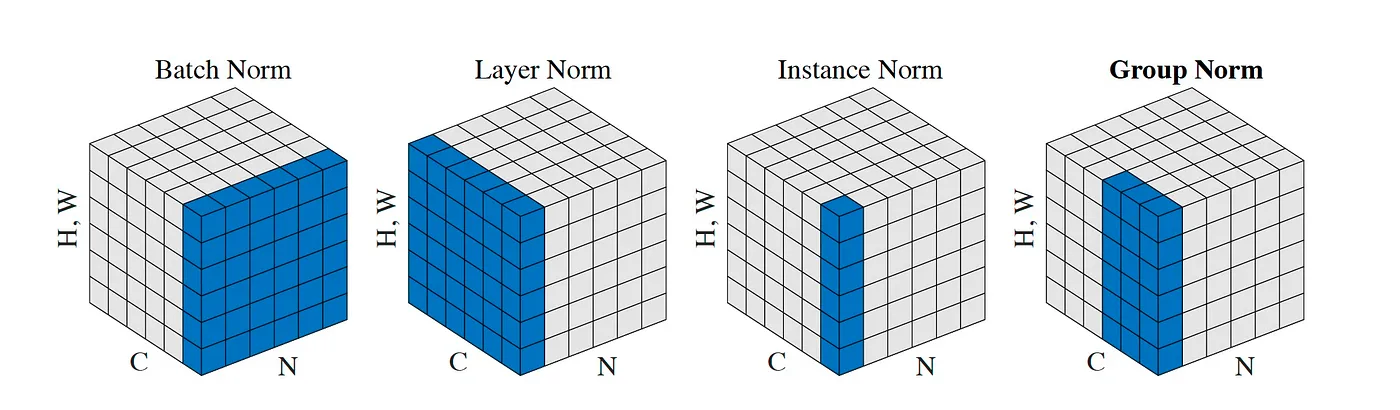